In [1]:
import pandas as pd
import numpy as np

# Importing Data

In [6]:
d=pd.read_csv("Crop_recommendation.csv")
d.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
d.shape

(2200, 8)

In [10]:
d.mean(numeric_only=True)

,0
N,50.551818
P,53.362727
K,48.149091
temperature,25.616244
humidity,71.481779
ph,6.469480
rainfall,103.463655


In [12]:
d.median(numeric_only=True)

,0
N,37.000000
P,51.000000
K,32.000000
temperature,25.598693
humidity,80.473146
ph,6.425045
rainfall,94.867624


In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
d.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [15]:
d.fillna(0, inplace=True)

In [16]:
d.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [17]:
d['K'].fillna(d['K'].mean(), inplace=True)
d['humidity'].fillna(d['humidity'].mean(), inplace=True)
d['ph'].fillna(d['ph'].mean(), inplace=True)
d['rainfall'].fillna(d['rainfall'].mean(), inplace=True)

In [18]:
count_K = d['K'].value_counts().get(0, 0)
print(count_K,end=' ')
count_humidity = d['humidity'].value_counts().get(0, 0)
print(count_humidity,end=' ')
count_ph = d['ph'].value_counts().get(0, 0)
print(count_ph,end=" ")
count_rainfall = d['rainfall'].value_counts().get(0, 0)
print(count_rainfall)

0 0 0 0


In [19]:
d.duplicated().sum()

0

In [20]:
d.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [21]:
columns = ['N','P','K','temperature','humidity','ph','rainfall']

In [22]:
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

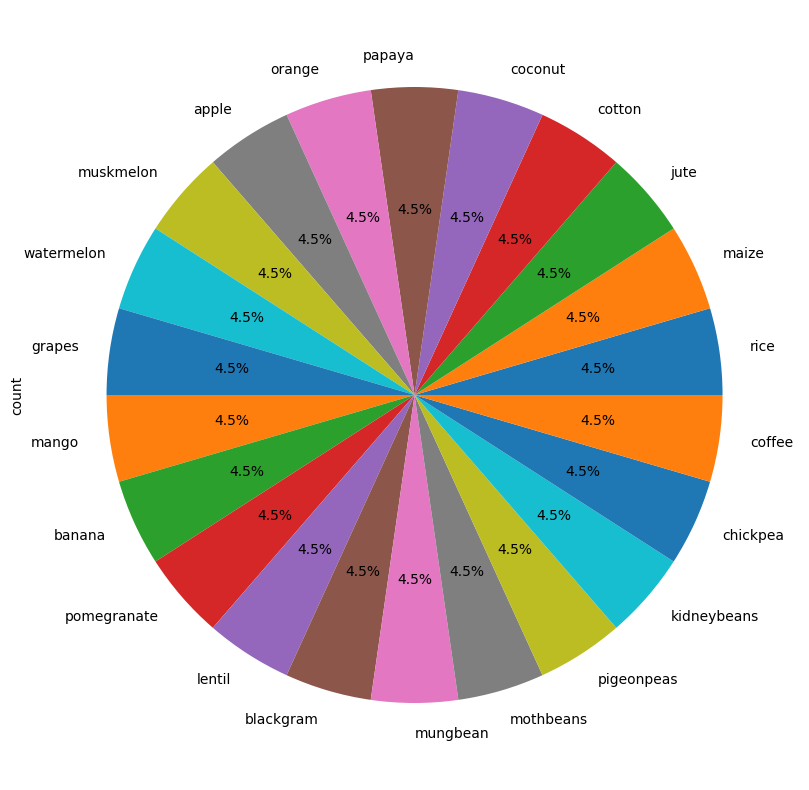

In [23]:
plt.figure(figsize=(10,10))
d['label'].value_counts().plot(kind = 'pie',autopct = '%.1f%%')

In [24]:
import seaborn as sns

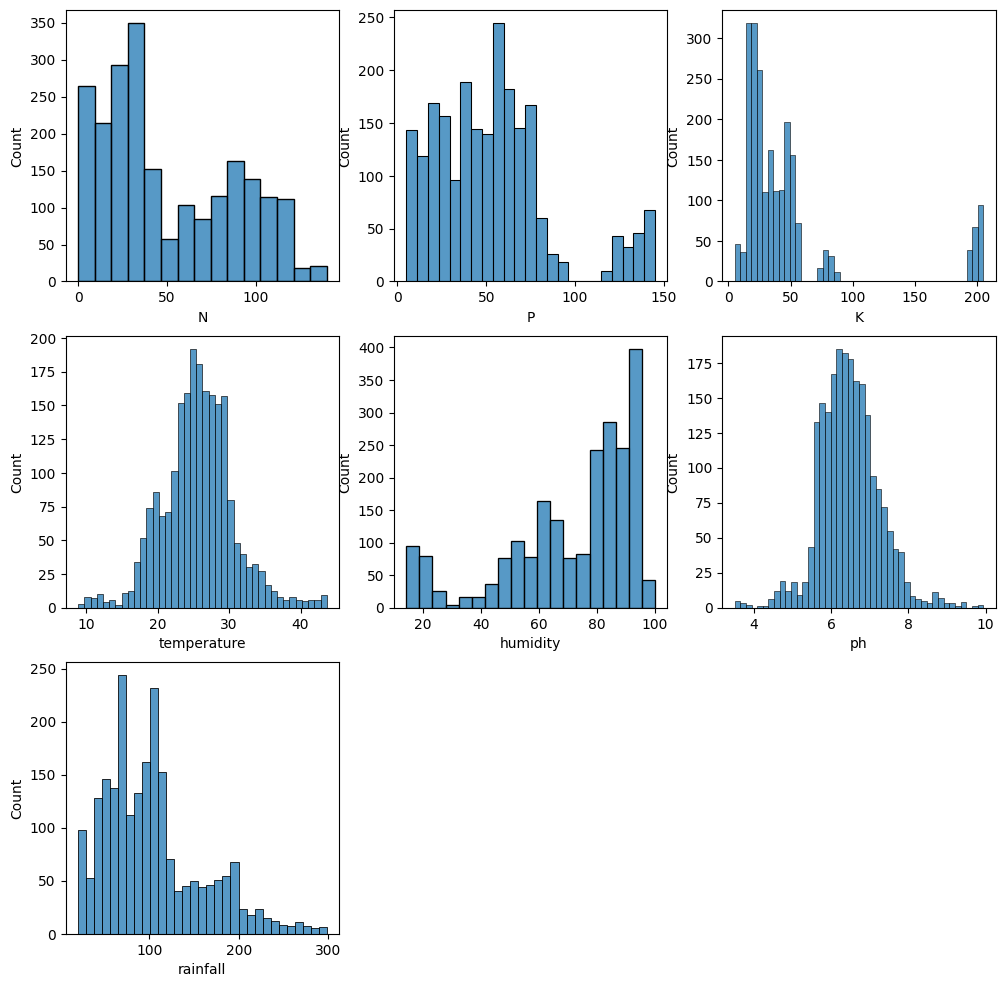

In [25]:
plt.figure(figsize=(12,12))
i=1
for col in d.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.histplot(d[col])
    i+=1

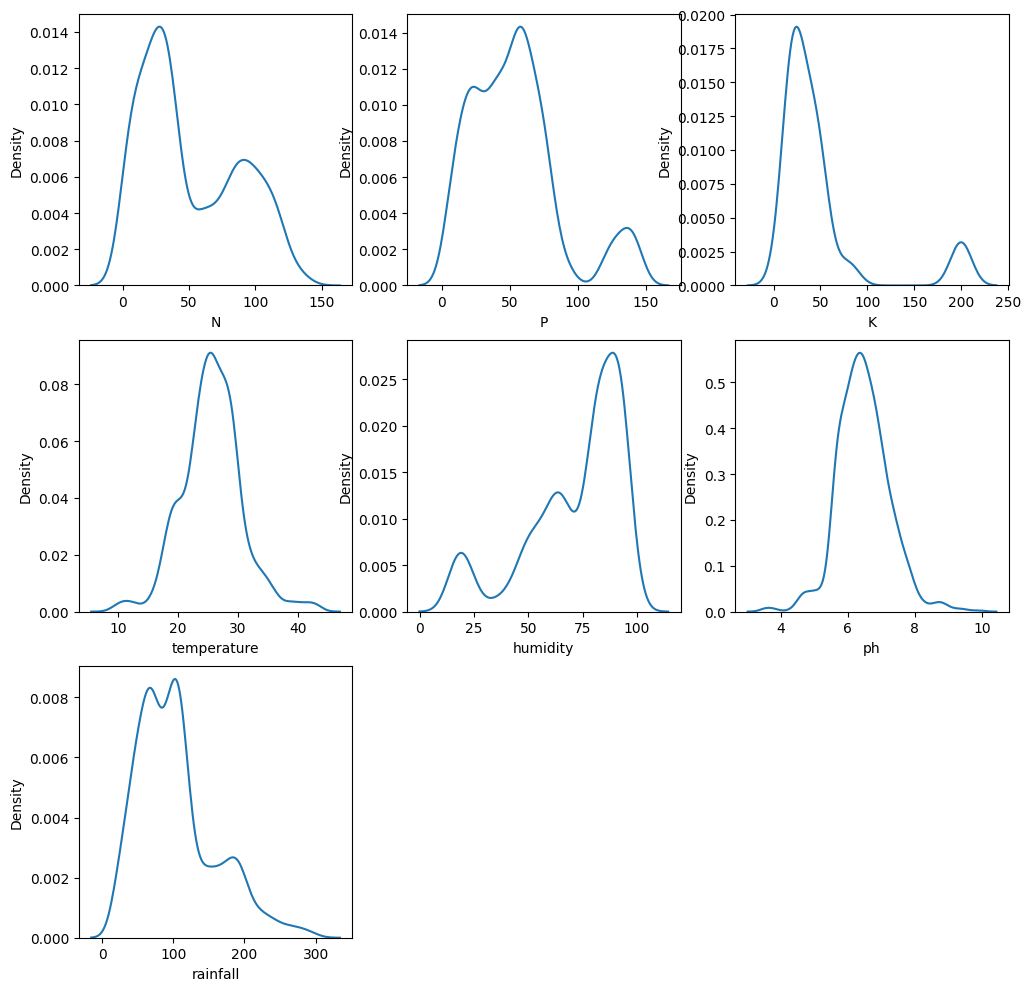

In [26]:
plt.figure(figsize=(12,12))
i=1
for col in d.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.kdeplot(d[col])
    i+=1

In [27]:
s=d[["N","P","K","temperature","humidity","ph","rainfall"]]
s.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [28]:
import seaborn as sns

<Axes: >

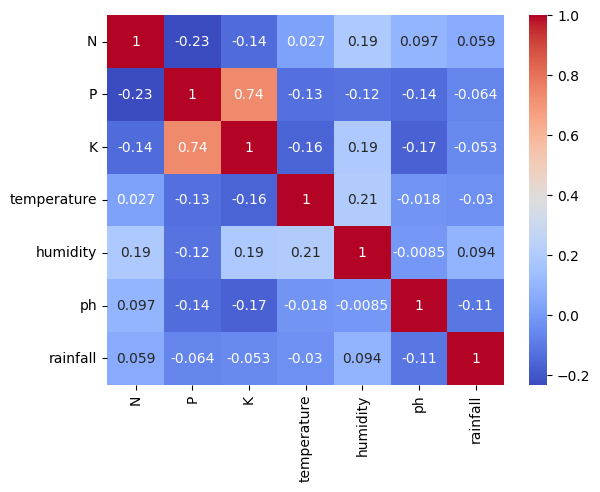

In [29]:
sns.heatmap(s.corr(),annot=True,cmap="coolwarm")

In [30]:
d["label"].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


# Encoding

In [31]:
crop_dict = {
            "rice":1,
            "maize":2,
            "jute":3,
            "cotton":4,
             "coconut":5,
             "papaya":6,
             "orange":7,
             "apple":8,
             "muskmelon":9,
             "watermelon":10,
             "grapes":11,
             "mango":12,
             "banana":13,
             "pomegranate":14,
             "lentil":15,
             "blackgram":16,
             "mungbean":17,
             "mothbeans":18,
             "pigeonpeas":19,
             "kidneybeans":20,
             "chickpea":21,
             "coffee":22
            }



In [32]:
d["crop_num"]=d["label"].map(crop_dict)

In [33]:
d["crop_num"].value_counts()

,count
crop_num,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [34]:
d.drop("label",axis=1,inplace=True)
d

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


## Train Test Split-1

In [35]:
x=d.drop(['crop_num'],axis=1)
y=d['crop_num']
y

,crop_num
0,1
1,1
2,1
3,1
4,1
...,...
2195,22
2196,22
2197,22
2198,22


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Scale the featues from MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(X_train)
X_train=ms.transform(X_train)
X_test=ms.transform(X_test)
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [39]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standardisation

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [41]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9590909090909091
Decision Tree  with accuracy : 0.9840909090909091
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9840909090909091
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9363636363636364


In [43]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)
ypred
accuracy_score(y_test,ypred)

0.9931818181818182

# Prediction

In [44]:
def recommendation(N,K,P,temperature,humidity,ph,rainfall):
    features=np.array([[N,K,P,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(ms.transform(features)).reshape(1,-1)
    return prediction[0]
predict=recommendation(5,52,17,28,12,40,500)
print(predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

[6]
Papaya is the best crop to be cultivated right there


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Train Test Split -2

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# MinMaxScalar

In [46]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(X_train)
X_train=ms.transform(X_train)
X_test=ms.transform(X_test)
X_train

array([[0.15      , 0.15      , 0.11      , ..., 0.38971557, 0.34132491,
        0.27135565],
       [0.20714286, 0.21428571, 0.115     , ..., 0.45813084, 0.53848884,
        0.25177055],
       [0.42857143, 0.27857143, 0.09      , ..., 0.65071988, 0.34490059,
        0.20261886],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standardisation

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [48]:
X_train

array([[-8.14149162e-01, -8.22608476e-01, -4.17586751e-01, ...,
        -1.10914730e+00, -1.00850068e+00, -1.14762954e-01],
       [-5.99794073e-01, -5.52511028e-01, -3.98018725e-01, ...,
        -8.39738838e-01,  6.40463882e-01, -2.12947619e-01],
       [ 2.30831896e-01, -2.82413580e-01, -4.95858854e-01, ...,
        -8.13537964e-02, -9.78595756e-01, -4.59356367e-01],
       ...,
       [-1.08209302e+00, -5.22500201e-01, -3.39314648e-01, ...,
        -9.20572349e-01,  6.00471872e-04, -3.53408620e-02],
       [-1.08209302e+00,  2.11845263e+00,  3.04595380e+00, ...,
         3.79045864e-01, -1.48070939e-01, -5.55371242e-01],
       [-5.19410914e-01,  7.37954558e-01, -5.15426879e-01, ...,
        -4.34666852e-01,  6.91994073e-01, -8.79579938e-01]])

# Training Models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9590909090909091
Naive Bayes  with accuracy : 0.9939393939393939
Support Vector Machine  with accuracy : 0.9727272727272728
K-Nearest Neighbors  with accuracy : 0.9606060606060606
Decision Tree  with accuracy : 0.9848484848484849
Random Forest  with accuracy : 0.9924242424242424
Bagging  with accuracy : 0.990909090909091
AdaBoost  with accuracy : 0.2106060606060606
Gradient Boosting  with accuracy : 0.9833333333333333
Extra Trees  with accuracy : 0.8863636363636364


In [50]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)
ypred
accuracy_score(y_test,ypred)

0.9893939393939394

# Prediction

In [51]:
def recommendation(N,K,P,temperature,humidity,ph,rainfall):
    features=np.array([[N,K,P,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(ms.transform(features)).reshape(1,-1)
    return prediction[0]
predict=recommendation(5,52,17,28,12,40,500)
print(predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

[6]
Papaya is the best crop to be cultivated right there


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Train Test Split -3

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# MinMaxScalar

In [53]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(X_train)
X_train=ms.transform(X_train)
X_test=ms.transform(X_test)
X_train

array([[0.3       , 0.40714286, 0.35      , ..., 0.05403988, 0.53012446,
        0.22115364],
       [0.        , 0.12857143, 0.05      , ..., 0.92305139, 0.62462246,
        0.32188884],
       [0.06428571, 0.36428571, 0.06      , ..., 0.61262808, 0.40984347,
        0.09395275],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43766892, 0.44414783,
        0.28736163],
       [0.07857143, 0.85      , 0.995     , ..., 0.76775145, 0.42578221,
        0.183571  ],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56108125, 0.52955682,
        0.11886358]])

# Standardisation

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [55]:
X_train

array([[-0.2619886 ,  0.27742187,  0.54808955, ..., -2.46371389,
         0.69361281, -0.38336326],
       [-1.3868839 , -0.90718975, -0.65420078, ...,  0.98262363,
         1.46525822,  0.11650713],
       [-1.14583491,  0.09517393, -0.61412443, ..., -0.24845732,
        -0.2885696 , -1.01456226],
       ...,
       [-1.09226847, -0.51231921, -0.33359002, ..., -0.9423127 ,
        -0.00844933, -0.05482453],
       [-1.09226847,  2.1606506 ,  3.13301374, ...,  0.36673305,
        -0.15841809, -0.56985663],
       [-0.52982082,  0.76341638, -0.51393357, ..., -0.45288241,
         0.6889776 , -0.89094919]])

# Training Models

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9579545454545455
Naive Bayes  with accuracy : 0.9931818181818182
Support Vector Machine  with accuracy : 0.9761363636363637
K-Nearest Neighbors  with accuracy : 0.9670454545454545
Decision Tree  with accuracy : 0.9852272727272727
Random Forest  with accuracy : 0.9920454545454546
Bagging  with accuracy : 0.9931818181818182
AdaBoost  with accuracy : 0.11818181818181818
Gradient Boosting  with accuracy : 0.9863636363636363
Extra Trees  with accuracy : 0.9125


# Prediction

In [57]:
def recommendation(N,K,P,temperature,humidity,ph,rainfall):
    features=np.array([[N,K,P,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(ms.transform(features)).reshape(1,-1)
    return prediction[0]
predict=recommendation(5,52,17,28,12,40,500)
print(predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

[6]
Papaya is the best crop to be cultivated right there


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Naive Bayes Model

In [58]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Create and train a Naive Bayes classifier
nb = GaussianNB()
ms = StandardScaler()

# Preprocess the training data
X_train_scaled = ms.fit_transform(X_train)

# Train the Naive Bayes classifier
nb.fit(X_train_scaled, y_train)

GaussianNB()

# Prediction

In [59]:
# Function to make recommendations using the Naive Bayes classifier
def recommendation(N, K, P, temperature, humidity, ph, rainfall):
    features = np.array([[N, K, P, temperature, humidity, ph, rainfall]])
    prediction = nb.predict(ms.transform(features)).reshape(1, -1)
    return prediction[0]

predict = recommendation(5, 52, 17, 28, 12, 40, 500)
print(predict)

# Crop dictionary
crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
    8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
    14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
    19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
}

# Determine and print the best crop to be cultivated
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")


[6]
Papaya is the best crop to be cultivated right there


# Merging Columns Feature_Engineering

In [60]:
d['tmp_ph_interaction'] = d['ph'] * d['temperature']
d['tmp_ph_interaction']

,tmp_ph_interaction
0,135.780666
1,153.222607
2,180.359725
3,184.918473
4,153.562493
...,...
2195,181.533749
2196,166.885834
2197,153.541160
2198,177.569826
